In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
msg = "This is a future warning message."
from sklearn import metrics
#warnings.warn(msg, category=FutureWarning)

In [2]:
raw_data= load_boston()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

In [3]:
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston = pd.DataFrame(raw_data.data,columns= raw_data.feature_names)
dataset=pd.DataFrame(np.c_[boston['CHAS'],boston['CRIM'] , boston['NOX'] , boston['INDUS']] , columns=['CHAS','CRIM','NOX','INDUS'])

In [5]:
dataset

,CHAS,CRIM,NOX,INDUS
0,0.0,0.00632,0.538,2.31
1,0.0,0.02731,0.469,7.07
2,0.0,0.02729,0.469,7.07
3,0.0,0.03237,0.458,2.18
4,0.0,0.06905,0.458,2.18
...,...,...,...,...
501,0.0,0.06263,0.573,11.93
502,0.0,0.04527,0.573,11.93
503,0.0,0.06076,0.573,11.93
504,0.0,0.10959,0.573,11.93


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
X= dataset[:-100]
Y=raw_data.target[:-100]
X_test= dataset[-100:]
Y_test=raw_data.target[-100:]


In [8]:
print(X.shape,Y.shape,X_test.shape,Y_test.shape)

(406, 4) (406,) (100, 4) (100,)


In [9]:
u=np.mean(dataset,axis=0)
std = np.std(dataset,axis=0)

In [10]:
print(u,std)

CHAS      0.069170
CRIM      3.613524
NOX       0.554695
INDUS    11.136779
dtype: float64 CHAS     0.253743
CRIM     8.593041
NOX      0.115763
INDUS    6.853571
dtype: float64


In [11]:
X=(X-u)/std

X_test = (X_test-u)/std

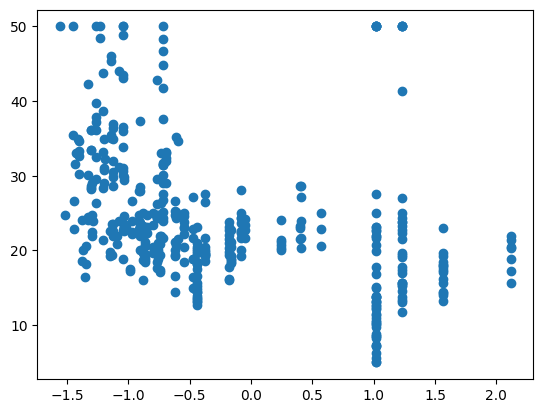

In [12]:
plt.scatter(X.iloc[:,3],Y)
plt.show()

In [13]:
ones= np.ones((X.shape[0],1))

In [14]:
X = np.hstack((ones,X))

In [15]:
def hypothesis(X,theta):
    y_=0
    
    n=X.shape[0]
    for i in range(n):
        y_+=theta[i]*X[i]
    return y_

In [16]:
def cost (X,Y,theta):
    m=X.shape[0]
    total_loss= 0
    for i in range(m):
        y_p= hypothesis(X[i],theta)
        y_gt = Y[i]
        total_loss+=(y_p-y_gt)**2
    return total_loss/m

In [17]:
def gradient(X, Y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_p = hypothesis(X[i], theta)
            y_gt = Y[i]
            grad[j] += (y_p - y_gt) * X[i][j]
    return grad / m

In [18]:
print (X_test.shape, X)

(100, 4) [[ 1.         -0.27259857 -0.41978194 -0.14421743 -1.2879095 ]
 [ 1.         -0.27259857 -0.41733926 -0.74026221 -0.59338101]
 [ 1.         -0.27259857 -0.41734159 -0.74026221 -0.59338101]
 ...
 [ 1.         -0.27259857  2.46573659  1.19472373  1.01599907]
 [ 1.         -0.27259857  4.41236983  1.19472373  1.01599907]
 [ 1.         -0.27259857  7.48364564  1.19472373  1.01599907]]


In [19]:
def gradient_descent(X, Y, learning_rate=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros((n,))
    cost_epoch = []

    for epoch in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        for j in range(n):
            theta[j] = theta[j] - learning_rate * grad[j]

    return theta, cost_epoch

In [20]:
theta ,cost_epoch = gradient_descent(X,Y,learning_rate=0.03,epochs=1000)

In [21]:
cost_epoch[-10:]

[66.7407403272206,
 66.74074032471316,
 66.74074032224037,
 66.74074031980179,
 66.74074031739676,
 66.74074031502509,
 66.7407403126861,
 66.74074031037945,
 66.74074030810469,
 66.74074030586132]

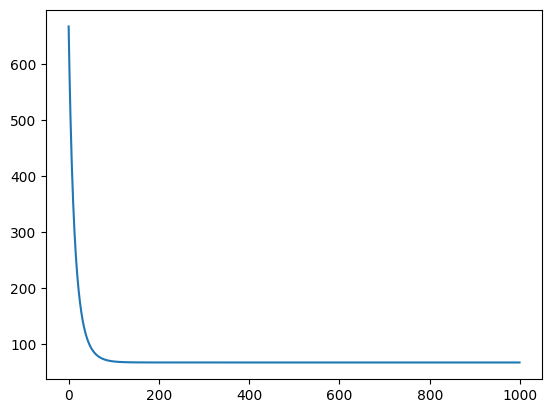

In [22]:
plt.plot(cost_epoch)

In [23]:
def r2_score (y_t,y_p):
    num = np.sum((y_t-y_p)**2)
    den = np.sum((y_t-y_t.mean())**2)
    score = (1-num/den)
    
    return score

In [24]:
r2_score

<function __main__.r2_score(y_t, y_p)>

In [25]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones, X_test))
print(X_test [:4,:])

[[ 1.         -0.27259857  1.99029374  0.90102051  1.01599907]
 [ 1.         -0.27259857  0.97027072  0.90102051  1.01599907]
 [ 1.         -0.27259857  0.4410972   0.36544404  1.01599907]
 [ 1.         -0.27259857  1.25971423  0.36544404  1.01599907]]


In [26]:
y_pred_test=[]
for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i],theta)
    y_pred_test.append(pred)
y_pred_test = np.array(y_pred_test)

In [27]:
for i in range(len(y_pred_test)):
    print (y_pred_test[i],Y_test[i])

14.771425619047305 11.9
16.8256615522445 27.9
18.12534845162915 17.2
16.476726326286407 27.5
7.876103040926964 15.0
16.567566344963573 17.2
15.451916858614462 17.9
13.144636631904012 16.3
8.776973065454614 7.0
15.312704654547057 7.2
17.011947356861118 7.5
13.47153028218426 10.4
2.3172618897391417 8.8
16.635534667746477 8.4
16.805426126825626 16.7
17.758076839723287 14.2
16.97272765626019 20.8
18.144034231452064 13.4
17.849055382011066 11.7
15.834003554298404 8.3
17.039304268153728 10.2
10.72446343254372 10.9
17.824513198851356 11.0
17.362396243156663 9.5
17.919362650336566 14.5
17.551369172198466 14.1
18.39936168401131 16.1
18.114788432786476 14.3
16.161978802176787 11.7
16.705292885717085 13.4
15.941168022726798 9.6
15.763894054389832 8.7
16.11523118545005 8.4
17.120065692358697 12.8
14.152889915109709 10.5
17.041893122106455 17.1
17.992903277391267 18.4
16.985092330242168 15.4
16.320488379354753 10.8
16.819803807093926 11.8
17.847198324832974 14.9
16.994863022653547 12.6
17.236382326

In [28]:
score = r2_score(Y_test , y_pred_test)

In [29]:
score

0.14706168385811536

In [30]:
print ("MAE distance " , metrics.mean_absolute_error(Y_test,y_pred_test))
print ("MSE distance" , metrics.mean_squared_error(Y_test,y_pred_test))
print("RMSE distance" , np.sqrt(metrics.mean_squared_error(Y_test,y_pred_test)))

MAE distance  3.795995064002779
MSE distance 21.8435617770258
RMSE distance 4.673709637646074
